<a href="https://colab.research.google.com/github/jiho-kang/Data_Analysis_Project/blob/main/Video%20Game%20Sales/data_analysis_for_new_game_launching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data From
https://www.kaggle.com/gregorut/videogamesales

### 다음 분기에 어떤 게임을 설계해야 할까
다음 분기에 어떤 게임을 설계해야 할까를 정하는 과정과 그 결과를 보여주는 것이 목표입니다.
데이터셋을 읽는 것 부터, 이러한 게임을 만들어야 한다는 결론까지 의 과정을 colab을 사용하여 작성



> Name : 게임의 이름입니다.

> Platform : 게임이 지원되는 플랫폼의 이름입니다.

> Year : 게임이 출시된 연도입니다.

> Genre : 게임의 장르입니다.

> Publisher : 게임을 제작한 회사입니다.

> NA_Sales : 북미지역에서의 출고량입니다.

> EU_Sales : 유럽지역에서의 출고량입니다.

> JP_Sales : 일본지역에서의 출고량입니다.

> Other_Sales : 기타지역에서의 출고량입니다.

* 지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.

* 연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.

* 출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.








In [2]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 데이터 전처리
1. 결측치 처리
2. year 데이터 전처리
3. sales열 단위 맞추기 & numeric으로 변경
4. Total sales열 만들기
**결과: df**

**2006년~2016년 데이터: df_10**

#####0. 파일 불러오기



In [54]:
import pandas as pd

# 파일 불러오기
df_ori = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/vgames2.csv')

# 0열 제거
df_ori = df_ori.iloc[:,1:]
df_ori

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


#####1. 결측치 처리
- Year 데이터의 최댓값은 2020이므로 9999로 대체, Year 결측 데이터: 271개
- 기타 결측치: Unknown

In [55]:
df = df_ori.copy()
df.duplicated(keep = 'first')
df.Year.fillna(9999,inplace=True)
df.fillna("Unknown",inplace=True)

#####2. Year 데이터 전처리
- 결측치 -> 0
- 기타 > 1950년 으로 수정
- data_type to int


In [56]:
for i in df[df.Year<50].index:
  df.Year.iloc[i] += 2000

for i in df[(50<=df.Year) & (df.Year<=99)].index:
  df.Year.iloc[i] += 1900

for i in df[df.Year == 9999].index:
  df.Year.iloc[i] = 0

df.Year = df.Year.astype(int)
df = df.sort_values('Year',ascending=False)
df.reset_index(drop=True,inplace=True)
df

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setit

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Imagine: Makeup Artist,DS,2020,Simulation,Ubisoft,0.27,0K,0,0.02
1,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0,0,0.03,0
2,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0,0,0.01,0
3,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0,0,0.01,0
4,Diabolik Lovers: Lunatic Parade,PSV,2016,Adventure,Idea Factory,0,0,0.03,0
...,...,...,...,...,...,...,...,...,...
16593,PDC World Championship Darts 2008,DS,0,Sports,Unknown,0.01,0,0,0
16594,Dinotopia: The Sunstone Odyssey,GC,0,Action,Unknown,0.01,0,0,0
16595,LEGO Harry Potter: Years 5-7,3DS,0,Action,Warner Bros. Interactive Entertainment,0.18,0.19,0,0.04
16596,Def Jam: Fight for NY,XB,0,Fighting,Electronic Arts,0.43,0.1,0,0.02


#####3. sales열 단위 맞추기 & numeric으로 변경
- 'k'와 'm' 제거 및 m단위로 통일
-type to float

In [57]:
def tofloat(n):
  try:
    float(n)
  except:
    if 'M' in n:
      n = n[:-1]
    elif "K" in n:
      n = float(n[:-1])/1000
  return n

df['NA_Sales'] = df['NA_Sales'].apply(tofloat).astype(float)
df['EU_Sales'] = df['EU_Sales'].apply(tofloat).astype(float)
df['JP_Sales'] = df['JP_Sales'].apply(tofloat).astype(float)
df['Other_Sales'] = df['Other_Sales'].apply(tofloat).astype(float)

#####4. Total sales열 만들기

In [58]:
df['Total_Sales'] = df[df.columns[5:]].sum(axis=1)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Imagine: Makeup Artist,DS,2020,Simulation,Ubisoft,0.27,0.00,0.00,0.02,0.29
1,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0.00,0.00,0.03,0.00,0.03
2,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0.00,0.00,0.01,0.00,0.01
3,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0.00,0.00,0.01,0.00,0.01
4,Diabolik Lovers: Lunatic Parade,PSV,2016,Adventure,Idea Factory,0.00,0.00,0.03,0.00,0.03
...,...,...,...,...,...,...,...,...,...,...
16593,PDC World Championship Darts 2008,DS,0,Sports,Unknown,0.01,0.00,0.00,0.00,0.01
16594,Dinotopia: The Sunstone Odyssey,GC,0,Action,Unknown,0.01,0.00,0.00,0.00,0.01
16595,LEGO Harry Potter: Years 5-7,3DS,0,Action,Warner Bros. Interactive Entertainment,0.18,0.19,0.00,0.04,0.41
16596,Def Jam: Fight for NY,XB,0,Fighting,Electronic Arts,0.43,0.10,0.00,0.02,0.55


#####**결과**

In [59]:
df.info()
df

df_10 = df[(df.Year>2005) & (df.Year<2017)]
df_10

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16598 non-null  int64  
 3   Genre        16598 non-null  object 
 4   Publisher    16598 non-null  object 
 5   NA_Sales     16598 non-null  float64
 6   EU_Sales     16598 non-null  float64
 7   JP_Sales     16598 non-null  float64
 8   Other_Sales  16598 non-null  float64
 9   Total_Sales  16598 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 1.3+ MB


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
4,Diabolik Lovers: Lunatic Parade,PSV,2016,Adventure,Idea Factory,0.00,0.00,0.03,0.00,0.03
5,EA Sports UFC 2,PS4,2016,Sports,Electronic Arts,0.28,0.47,0.00,0.14,0.89
6,Dragon Quest Heroes II: Twin Kings and the Pro...,PS3,2016,Action,Square Enix,0.00,0.00,0.13,0.00,0.13
7,Toukiden 2,PS3,2016,Action,Tecmo Koei,0.00,0.00,0.02,0.00,0.02
8,Card Fight!! Vanguard G: Stride to Victory!!,3DS,2016,Misc,FuRyu,0.00,0.00,0.04,0.00,0.04
...,...,...,...,...,...,...,...,...,...,...
10209,Rozen Maiden: Duellwalzer,PS2,2006,Adventure,Taito,0.00,0.00,0.02,0.00,0.02
10210,Clue / Mouse Trap / Perfection / Aggravation,DS,2006,Misc,Unknown,0.02,0.00,0.00,0.00,0.02
10211,Lord of the Rings: Battle for Middle-Earth,X360,2006,Strategy,Electronic Arts,0.28,0.00,0.00,0.02,0.30
10212,FIFA World Cup Germany 2006,XB,2006,Sports,Electronic Arts,0.18,0.05,0.00,0.01,0.24


## 지역별 선호하는 장르는 다를까?
1. 지역과 장르의 chi-square test를 통해 둘 사의 연관성 파악
2. 지역별 장르 선호도 시각화

#####**1. 지역과 장르의 chi-square test를 통해 둘 사이의 연관성 파악**
귀무가설: 지역과 장르는 독립적이다.

p값(4.2091563967215527e-57)은 0.05보다 작으므로 귀무가설을 기각한다.

즉, **지역과 장르는 독립적이지 않고 연관성이 있다**고 할 수 있다.


In [60]:
from scipy.stats import chi2_contingency

# 장르별 지역 sales의 합을 위한 전처리
country_genre = df_10.groupby('Genre').sum().iloc[:-1,1:-1]
country_genre

# # chi-square test 실행
country_genre_chi2 = chi2_contingency(country_genre,correction=False)
print(country_genre_chi2)

(362.4328327537513, 4.2091563967215527e-57, 33, array([[532.28838564, 336.32095748, 122.57472545, 124.70593143],
       [ 67.91161984,  42.90926051,  15.63860565,  15.91051399],
       [ 90.28806212,  57.04758608,  20.79142571,  21.1529261 ],
       [263.25590977, 166.33554671,  60.6222524 ,  61.67629112],
       [134.79290254,  85.16751307,  31.03994652,  31.57963787],
       [ 43.67961669,  27.59851784,  10.05848929,  10.23337618],
       [143.80835253,  90.86383269,  33.11601343,  33.69180135],
       [235.9090448 , 149.05671054,  54.32484942,  55.26939523],
       [334.48750485, 211.34249953,  77.02537793,  78.36461769],
       [105.66202789,  66.76146868,  24.33172395,  24.75477948],
       [378.014479  , 238.84457175,  87.04871688,  88.56223237],
       [ 35.12209432,  22.1915351 ,   8.08787339,   8.22849719]]))


In [61]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# new = scaler.fit_transform(l_genre)
# new

#####**2. 지역별 장르 선호도 시각화**
[NA, EU, Others]
- Top3 장르: Actoin, Sports, Shooter
- 최하위 장르: Role-Playing

[JP]
- Top 장르: Role-Playing이 압도적

In [62]:
country_genre

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,527.15,353.81,99.62,135.31
Adventure,62.01,38.45,29.18,12.73
Fighting,94.15,43.52,28.47,23.14
Misc,285.80,146.38,61.69,58.02
Platform,135.56,82.78,35.14,29.10
Puzzle,43.25,28.49,12.43,7.40
Racing,132.73,115.02,13.17,40.56
Role-Playing,188.98,105.86,160.57,39.15
Shooter,363.39,234.80,18.85,84.18


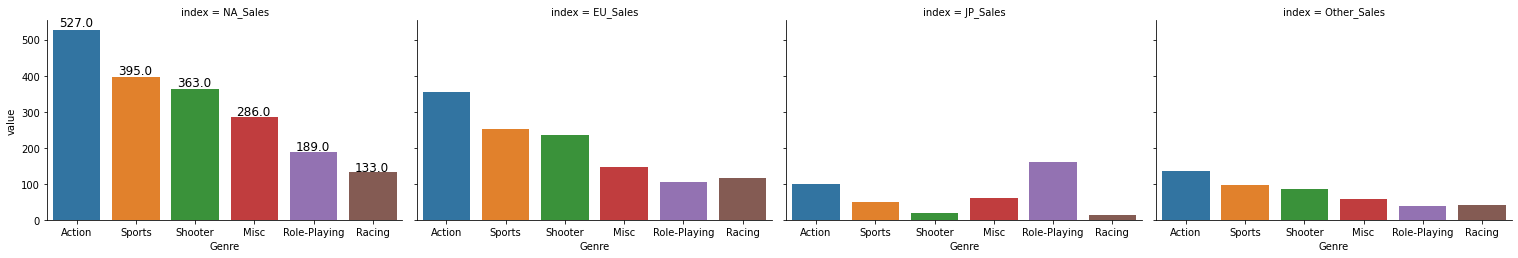

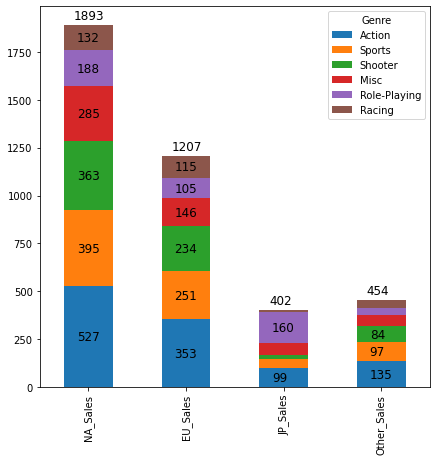

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

cg_new = df_10.copy()

# 판매량이 높은 장르 6개만 추출
cg_new = cg_new.groupby('Genre').sum().iloc[:-1,1:]
cg_new = cg_new.sort_values('Total_Sales',ascending=False)
cg_new = cg_new.iloc[:6,:-1]

# 시각화를 위한 전처리
cg_new_T = cg_new.T
cg_new_T.reset_index(inplace=True)
cg_new_T_tidy = cg_new_T.melt(id_vars = 'index', value_vars = cg_new_T.columns[1:])

# 시각화
cg = sns.catplot(x = 'Genre', y = 'value', col = 'index', kind = 'bar', data = cg_new_T_tidy, height = 3.5, aspect = 1.5);
ax = cg.facet_axis(0,0)
for p in ax.patches:
  ax.text(p.get_x() + 0.1,
          p.get_height() * 1.02,
          round(p.get_height(),0),
          color = 'black',
          size = 'large',
          rotation = 'horizontal')


cg_new.T.plot.bar(stacked=True,figsize=(7,7));

cg_newT = cg_new.T
cg_T_ind = cg_newT.index
x = range(len(cg_T_ind))
cg_T_col = cg_newT.columns
for i in range(len(cg_T_ind)):
  sum = 0
  value = 0
  for j in range(len(cg_T_col)):
    sum += cg_newT.iloc[i,j]
    value =int(cg_newT.iloc[i,j])
    if value >70:
      plt.text(x[i]-0.12,sum - (cg_newT.iloc[i,j]/2)-20,value,size=12)
  plt.text(x[i]-0.15,sum+30,int(sum),size=12)



#####**3. 장르와 플랫폼 관계**
[NA, EU, Others]
- Top3 
- 최하위

[JP]
- Top

In [64]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Imagine: Makeup Artist,DS,2020,Simulation,Ubisoft,0.27,0.00,0.00,0.02,0.29
1,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0.00,0.00,0.03,0.00,0.03
2,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0.00,0.00,0.01,0.00,0.01
3,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0.00,0.00,0.01,0.00,0.01
4,Diabolik Lovers: Lunatic Parade,PSV,2016,Adventure,Idea Factory,0.00,0.00,0.03,0.00,0.03
...,...,...,...,...,...,...,...,...,...,...
16593,PDC World Championship Darts 2008,DS,0,Sports,Unknown,0.01,0.00,0.00,0.00,0.01
16594,Dinotopia: The Sunstone Odyssey,GC,0,Action,Unknown,0.01,0.00,0.00,0.00,0.01
16595,LEGO Harry Potter: Years 5-7,3DS,0,Action,Warner Bros. Interactive Entertainment,0.18,0.19,0.00,0.04,0.41
16596,Def Jam: Fight for NY,XB,0,Fighting,Electronic Arts,0.43,0.10,0.00,0.02,0.55


In [65]:
genre_platform = pd.DataFrame(df_10.pivot_table(index='Genre',columns='Platform',values='Name',aggfunc=['count'], fill_value=0))
headlst = df_10.pivot_table(index='Genre',columns='Platform',values='Name',aggfunc=['count'], fill_value=0)
headlst = list(headlst.columns)
head = []
for i in headlst:
  head.append(i[1])
genre_platform.columns = head
genre_platform['All'] = genre_platform.sum(axis=1)
genre_platform.sort_values('All',ascending=False,inplace=True)
genre_platform = genre_platform.iloc[:,:-1]
genre_platform.loc['All'] = genre_platform.sum()
genre_platform.sort_values(by = 'All',ascending=False,axis=1,inplace=True)
genre_platform = genre_platform.iloc[:6,:10]
genre_platform

,DS,PS3,Wii,X360,PSP,PS2,PC,3DS,PSV,PS4
Genre,,,,,,,,,,
Action,316,369,229,313,206,132,142,180,141,121
Sports,134,210,256,209,106,131,42,25,23,43
Misc,367,121,270,122,92,110,18,53,24,15
Adventure,232,72,83,47,210,139,56,36,85,19
Role-Playing,187,117,35,76,178,65,85,84,81,46
Shooter,38,155,60,194,32,27,115,6,5,34


## 연도별 게임의 트렌드가 있을까?
0. 시간에 따른 지역별 매출 변화
1. 연도별 장르 트렌드
2. 연도별 플랫폼 트렌드
3. 연도별 판매량이 높은 게임



##### 0. 시간에 따른 지역별 매출 변화

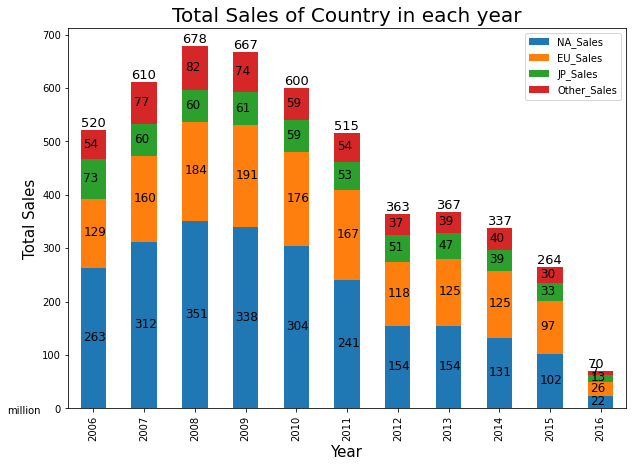

In [66]:
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt


# 연도 x 장르 데이터 생성
year_country = df_10.groupby('Year').sum()
year_country = year_country.iloc[:,:-1]
yc_graph = year_country

yc_graph.plot.bar(stacked=True,figsize=(10,7))
plt.title('Total Sales of Country in each year', fontsize=20)
plt.xlabel('Year',fontsize = 15)
plt.ylabel('Total Sales',fontsize=15)

for i in range(len(yc_graph.index)):
  plt.text(i-0.25,yc_graph.iloc[i,:].sum()+6,int(yc_graph.iloc[i,:].sum()), size = 13)

plt.text(-1.7,-10,s='million')

yc_ind = yc_graph.index
x = range(len(yc_ind))
yc_col = yc_graph.columns

for i in range(len(yc_ind)):
  sum = 0
  value = 0
  for j in range(len(yc_col)):
    sum += yc_graph.iloc[i,j]
    value =int(yc_graph.iloc[i,j])
    plt.text(x[i]-0.2,sum - (yc_graph.iloc[i,j]/2)-5,value,size=12)

plt.show();

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


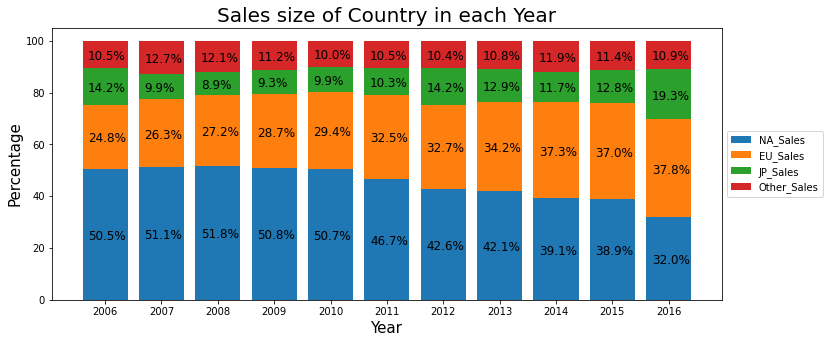

In [67]:
from matplotlib import pyplot as plt
import numpy as np

yc_ind = yc_graph.index
yc_col = yc_graph.columns

yc_graph100 = pd.DataFrame(index = yc_ind, columns=yc_col)
yc_graph100
for i in range(len(yc_ind)):
  yc_graph100.iloc[i] = yc_graph.iloc[i]/yc_graph.iloc[i].sum()

yc_graph100

topics = yc_ind
x = range(len(topics))
bottom = 0

plt.figure(figsize=(12,5))
for i in range(len(yc_col)):
  plt.bar(x,yc_graph100.iloc[:,i]*100,bottom=bottom)
  bottom = np.add(yc_graph100.iloc[:,i]*100,bottom)

ax = plt.subplot()
ax.set_xticks(x)
ax.set_xticklabels(topics)

plt.title('Sales size of Country in each Year', fontsize=20)
plt.xlabel('Year',fontsize = 15)
plt.ylabel('Percentage',fontsize=15)
plt.legend(yc_col, loc='center left',bbox_to_anchor=(1, 0.5))
plt.rc('font', family='NanumBarunGothic') 

for i in range(len(yc_ind)):
  sum = 0
  value = 0
  for j in range(len(yc_col)):
    sum += yc_graph100.iloc[i,j]*100
    value =round(yc_graph100.iloc[i,j]*100,2)
    plt.text(x[i]-0.3,sum - (yc_graph100.iloc[i,j]*100/2)-2,"%0.1f%%" % value,size=12)
    
plt.show();

##### 1. 연도별 장르 트렌드

**[chi-square test]**

귀무가설: 연도와 장르는 독립적이다.


> p값(3.515616887100207e-63)은 0.05보다 작으므로 귀무가설을 기각한다.

> 즉, **연도와 장르는 독립적이지 않고 연관성이 있다**고 할 수 있다

year_genre chi-square test, pvalue: 3.515616887100207e-63


sum                            ...                                    
Genre  Action Adventure Fighting   Misc  ... Simulation  Sports Strategy Unknown
Year                                     ...                                    
2006    66.49     11.48    22.53  67.23  ...      21.73  136.12     4.23    6.02
2007   105.99     24.44    17.63  92.28  ...      48.85   98.24     9.38    0.63
2008   135.46     24.91    35.41  86.18  ...      46.40   95.24    11.70    2.08
2009   138.32     20.67    32.18  76.90  ...      33.55  138.59    12.51    1.26
2010   117.50     16.57    14.88  88.40  ...      22.06   92.02    13.82    9.05
2011   119.00     15.88    22.11  55.77  ...      15.33   57.06     9.03    0.89
2012   120.81      5.90     9.53  22.93  ...      13.37   30.90     3.33    1.19
2013   125.21      6.61     7.23  25.66  ...       8.68   41.54     6.32   14.35
2014    99.01      6.09    16.15  23.73  ...       5.54   46.64     0.97    0.00
2015    68.25      8.01     7.78  11.66  ...       5.61   41.49     1.82    2.43
2016    19.85      1.81     3.85   1.15  ...       0.39   14.63     0.52    0.00

[11 rows x 13 columns]

**[연도별 장르 트렌드 시각화]**

과거의 데이터 보다는 최근 10년 동안을 더 자세하게 살펴보는게 좋다고 생각하여 최근 10개년만 가져옴

> 최근 10년간 장르 순위: Action -  Sports - Shooter -Misc - Role-Playing

> 최근 10년 중 판매량 1위인 **Action** 장르는 2012~2013년 가장 인기가 많았고, **매년 인기 장르 1위**를 기록하였다.

> 판매량 2위의 **Shooter** 장르는 2016년이 2007년 대비 2배 이상의 인기를 보였고, **매년 증가**하는 추세이다.

> 판매량 4위의 **Misc** 장르는 2010년을 제외하고 **매년 판매량이 감소**하였으며, 2016년에는 1.6%를 기록했다.

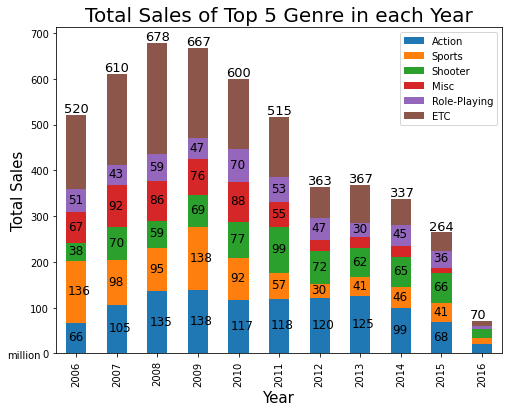

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

# 연도별 장르 트렌드
yg = year_genre.copy()
yg_head = []
for i in range(len(yg.columns)):
  yg_head.append(yg.columns[i][1])
yg.columns = yg_head

# 10년동안 가장 많은 genre별 sales를 기준으로 정렬 및 top5 선출
yg.loc['All'] = yg.sum()
yg.sort_values(by='All',axis=1,ascending=False, inplace=True)
yg_graph = yg.iloc[:-1,:5]
yg_graph['ETC'] = yg.iloc[:-1,5:].sum(axis=1)

yg_graph.plot.bar(stacked=True,figsize=(8,6))
plt.title('Total Sales of Top 5 Genre in each Year', fontsize=20)
plt.xlabel('Year',fontsize = 15)
plt.ylabel('Total Sales',fontsize=15)

for i in range(len(yg_graph.index)):
  plt.text(i-0.3,yg_graph.iloc[i,:].sum()+6,int(yg_graph.iloc[i,:].sum()), size = 13)

plt.text(-1.7,-10,s='million')

yg_ind = yg_graph.index
x = range(len(yg_ind))
yg_col = yg_graph.columns

for i in range(len(yg_ind)):
  sum = 0
  value = 0
  for j in range(len(yg_col[:-1])):
    sum += yg_graph.iloc[i,j]
    value =int(yg_graph.iloc[i,j])
    if value >= 30:
      plt.text(x[i]-0.2,sum - (yg_graph.iloc[i,j]/2)-5,value,size=12)

plt.show();


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


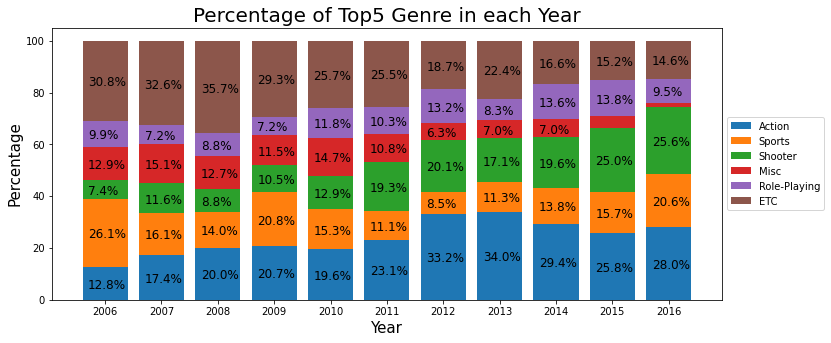

In [90]:
from matplotlib import pyplot as plt
import numpy as np

yg_ind = yg_graph.index
yg_col = yg_graph.columns

yg_graph_100 = pd.DataFrame(index = yg_ind, columns=yg_col)
for i in range(len(yg_ind)):
  yg_graph_100.iloc[i] = yg_graph.iloc[i]/yg_graph.iloc[i].sum()

topics = yg_ind
x = range(len(topics))
bottom = 0

plt.figure(figsize=(12,5))
for i in range(len(yg_col)):
  plt.bar(x,yg_graph_100.iloc[:,i]*100,bottom=bottom)
  bottom = np.add(yg_graph_100.iloc[:,i]*100,bottom)

ax = plt.subplot()
ax.set_xticks(x)
ax.set_xticklabels(topics)

plt.title('Percentage of Top5 Genre in each Year', fontsize=20)
plt.xlabel('Year',fontsize = 15)
plt.ylabel('Percentage',fontsize=15)
plt.legend(yg_col, loc='center left',bbox_to_anchor=(1, 0.5))
plt.rc('font', family='NanumBarunGothic') 

for i in range(len(yg_ind)):
  sum = 0
  value = 0
  for j in range(len(yg_col)):
    sum += yg_graph_100.iloc[i,j]*100
    value =round(yg_graph_100.iloc[i,j]*100,2)
    if value >= 6:
      plt.text(x[i]-0.3,sum - (yg_graph_100.iloc[i,j]*100/2)-2,"%0.1f%%" % value,size=12)
    
plt.show();

##### 2. 연도별 플렛폼 트렌드

**[chi-square test]**

귀무가설: 연도와 플랫폼는 독립적이다.

> p값 (0.0)은 0.05보다 작으므로 귀무가설을 기각한다.

> 즉, **연도와 플랫폼은 독립적이지 않고 연관성이 있다**고 할 수 있다

In [91]:
from scipy.stats import chi2_contingency

# 연도 x 플랫폼 데이터 생성
year_platform = pd.DataFrame(df_10.pivot_table(index='Year',columns='Platform',values='Total_Sales',aggfunc=['sum'], fill_value=0))

# chi-square test 실행
year_platform_chi2 = chi2_contingency(year_platform,correction=False)
print('year_platform chi-square test, pvalue:', year_platform_chi2[1])

year_platform

year_platform chi-square test, pvalue: 0.0


sum                             ...                                     
Platform    3DS    DC      DS   GBA     GC  ...     Wii   WiiU    X360     XB   XOne
Year                                        ...                                     
2006       0.00  0.00  121.00  5.28  11.26  ...  137.85   0.00   51.94  10.04   0.00
2007       0.00  0.02  149.02  3.40   0.27  ...  154.77   0.00   95.79   0.55   0.00
2008       0.00  0.04  147.62  0.00   0.00  ...  174.07   0.00  135.66   0.18   0.00
2009       0.00  0.00  121.87  0.00   0.00  ...  210.26   0.00  120.92   0.00   0.00
2010       0.00  0.00   88.02  0.00   0.00  ...  131.78   0.00  170.95   0.00   0.00
2011      62.58  0.00   27.81  0.00   0.00  ...   62.32   0.00  145.08   0.00   0.00
2012      51.10  0.00   11.60  0.00   0.00  ...   22.78  17.79  100.82   0.00   0.00
2013      55.86  0.00    1.96  0.00   0.00  ...    9.38  21.81   89.56   0.00  18.61
2014      43.12  0.00    0.02  0.00   0.00  ...    4.43  22.54   36.43   0.00  52.44
2015      26.97  0.00    0.00  0.00   0.00  ...    1.56  16.37   13.02   0.00  57.67
2016       6.55  0.00    0.00  0.00   0.00  ...    0.00   3.28    0.83   0.00  12.38

[11 rows x 16 columns]

**[연도별 플랫폼 트렌드 시각화]**

과거의 데이터 보다는 최근 10년 동안을 더 자세하게 살펴보는게 좋다고 생각하여 최근 10개년만 가져옴

> **Wii, DS**는 2007~2010년까지 전성기였다.

> **PS3, X360**은 2010~2013년에 50% 이상의 판매율을 보였다.

> **3DS**는 2011년에 등장하여 매년 약 10% 이상의 점유율을 보였다.

> **PS4**는 2013년에 등장하여 PS3에 이어 2014년부터 압도적인 점유율을 보였다.

> **XOne**은 2013년에 등장하여 2014년부터 PS4에 이어 두번째 점유율을 보였다.


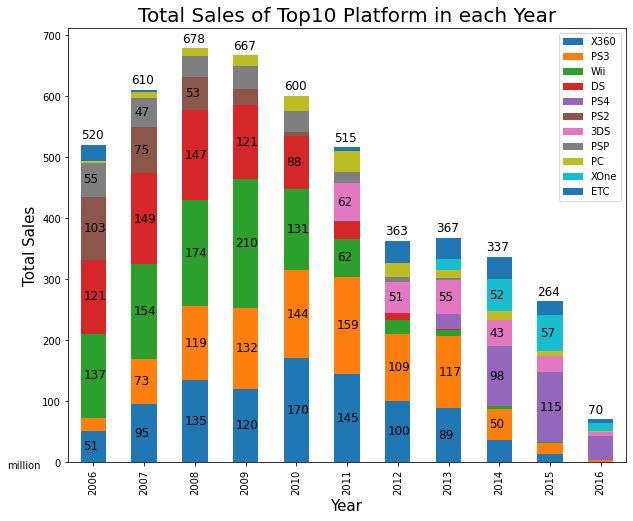

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

# 연도별 플랫폼 트렌드
yp = year_platform.copy()
yp_head = []
for i in range(len(yp.columns)):
  yp_head.append(yp.columns[i][1])
yp.columns = yp_head

# 10년동안 가장 많은 platform별 sales를 기준으로 정렬 및 top10 선출
yp.loc['All'] = yp.sum()
yp.sort_values(by='All',axis=1,ascending=False, inplace=True)
yp_graph = yp.iloc[:-1,:10]
yp_graph['ETC'] = yp.iloc[:-1,10:].sum(axis=1)


yp_graph.plot.bar(stacked=True,figsize=(10,8))
plt.title('Total Sales of Top10 Platform in each Year', fontsize=20)
plt.xlabel('Year',fontsize = 15)
plt.ylabel('Total Sales',fontsize=15)

for i in range(len(yp_graph.index)):
  plt.text(i-0.25,yp_graph.iloc[i,:].sum()+10,int(yp_graph.iloc[i,:].sum()), size = 12)

plt.text(-1.7,-10,s='million')

yp_ind = yp_graph.index
x = range(len(yp_ind))
yp_col = yp_graph.columns

for i in range(len(yp_ind)):
  sum = 0
  value = 0
  for j in range(len(yp_col[:-1])):
    sum += yp_graph.iloc[i,j]
    value =int(yp_graph.iloc[i,j])
    if value >= 40:
      plt.text(x[i]-0.2,sum - (yp_graph.iloc[i,j]/2)-5,value,size=12)

plt.show();

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


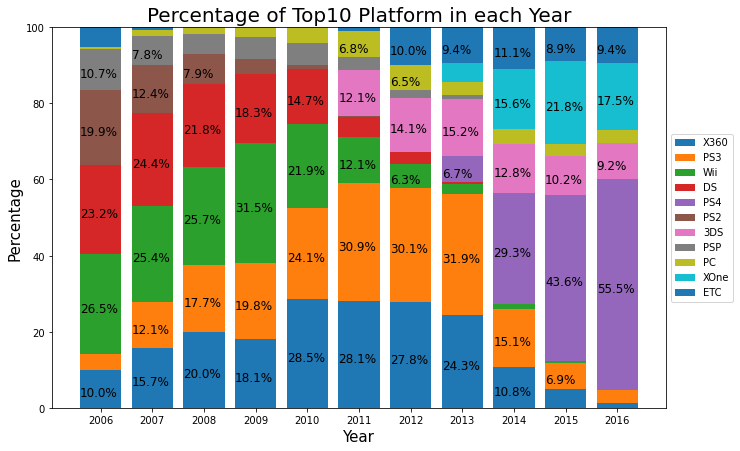

In [128]:
from matplotlib import pyplot as plt
import numpy as np

yp_ind = yp_graph.index
yp_col = yp_graph.columns

yp_graph_100 = pd.DataFrame(index = yp_ind, columns=yp_col)
yp_graph_100
for i in range(len(yp_ind)):
  yp_graph_100.iloc[i] = yp_graph.iloc[i]/yp_graph.iloc[i].sum()


topics = yp_ind
x = range(len(topics))
bottom = 0

plt.figure(figsize=(11,7))
for i in range(len(yp_col)):
  plt.bar(x,yp_graph_100.iloc[:,i]*100,bottom=bottom)
  bottom = np.add(yp_graph_100.iloc[:,i]*100,bottom)

ax = plt.subplot()
ax.set_xticks(x)
ax.set_xticklabels(topics)

plt.title('Percentage of Top10 Platform in each Year', fontsize=20)
plt.xlabel('Year',fontsize = 15)
plt.ylabel('Percentage',fontsize=15)
plt.legend(yp_col, loc='center left',bbox_to_anchor=(1, 0.5))
plt.rc('font', family='NanumBarunGothic') 

for i in range(len(yp_ind)):
  sum = 0
  value = 0
  for j in range(len(yp_col)):
    sum += yp_graph_100.iloc[i,j]*100
    value =round(yp_graph_100.iloc[i,j]*100,2)
    if value > 6:
      plt.text(x[i]-0.4,sum - (yp_graph_100.iloc[i,j]*100/2)-2,"%0.1f%%" % value,size=12)
    
plt.show();

##### 3. 연도별 판매량이 높은 게임

**[연도별 판매량 시각화]**


In [147]:
year_sales = df_10[(df_10.Genre == "Action") | (df_10.Genre == "Shooter")]
ys = pd.DataFrame(year_sales.pivot_table(index='Year',columns='Name',values='Total_Sales',aggfunc=['sum'], fill_value=0,margins=True))
head = []
for name in ys.columns:
  head.append(name[1])
ys.columns = head

ysnew = ys.copy()
ysnew = ysnew.T
ysnew = ysnew[ysnew.All >1.38].T
ys = ysnew

ys.sort_values(by='All',ascending=False,inplace=True,axis=1)
ys['top in total year'] = ys.iloc[:,:-1].sum(axis=1)
ys['%'] = round(ys["top in total year"] / ys['All'] * 100,2)
# ys.fillna(0)
ys


,All,Grand Theft Auto V,Call of Duty: Modern Warfare 3,Call of Duty: Black Ops II,Call of Duty: Black Ops,Call of Duty: Ghosts,Call of Duty: Black Ops 3,Call of Duty: Modern Warfare 2,Call of Duty: Advanced Warfare,Grand Theft Auto IV,Call of Duty 4: Modern Warfare,Battlefield 3,FIFA Soccer 13,Call of Duty: World at War,LEGO Star Wars: The Complete Saga,Battlefield 4,Assassin's Creed IV: Black Flag,Assassin's Creed III,Red Dead Redemption,Destiny,Halo 3,Pokemon HeartGold/Pokemon SoulSilver,Star Wars Battlefront (2015),Assassin's Creed II,Batman: Arkham City,The Last of Us,Star Wars: The Force Unleashed,Halo: Reach,LEGO Marvel Super Heroes,Halo 4,LEGO Indiana Jones: The Original Adventures,Watch Dogs,Assassin's Creed: Revelations,LEGO Batman: The Videogame,The Legend of Zelda: Twilight Princess,Resident Evil 5,Far Cry 4,LEGO Harry Potter: Years 1-4,Batman: Arkham Asylum,Assassin's Creed: Unity,...,Aliens: Colonial Marines,Gears of War: Judgment,Bully: Scholarship Edition,No Man's Sky,Medal of Honor Heroes 2,Hannah Montana: Music Jam,Kingdom Hearts 3D: Dream Drop Distance,Mad Max (2015),Guinness World Records: The Videogame,Indiana Jones and the Staff of Kings,The Godfather II,Call of Juarez: Bound in Blood,Dead Rising 3,Resident Evil: The Umbrella Chronicles,The Lord of the Rings: Conquest,Call of Duty: Modern Warfare: Reflex Edition,Kane & Lynch: Dead Men,Payday 2,Resistance 3,Phineas and Ferb: Across the 2nd Dimension,Dirge of Cerberus: Final Fantasy VII,The Incredible Hulk,PlayStation All-Stars Battle Royale,X-Men Origins: Wolverine - Uncaged Edition,Assassin's Creed III: Liberation,Spider-Man: Friend or Foe,The House of the Dead 2 & 3 Return,SpongeBob's Truth or Square (US sales),The Amazing Spider-Man 2 (2014),Turok,Monsters vs. Aliens,Alan Wake,Ninja Gaiden Sigma,Manhunt 2,Metroid: Other M,Mini Ninjas,Okami,Dead Island: Riptide,top in total year,%
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2006,104.84,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,8.91,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,1.48,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.63,0.00,171.59,163.67
2007,176.87,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,18.26,0.00,0.00,0.00,15.73,0.00,0.0,0.0,0.00,0.00,12.14,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.0,1.59,1.58,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.54,0.00,0.00,1.51,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,1.47,0.00,0.00,0.00,0.00,0.00,0.00,1.15,1.41,0.00,0.00,0.00,0.00,316.99,179.22
2008,194.97,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,21.61,0.00,0.00,0.00,15.88,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,10.21,0.00,0.00,0.00,9.69,0.0,0.0,9.18,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.61,0.0,0.00,0.00,0.00,0.00,1.56,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,1.48,0.00,0.00,0.00,0.00,1.46,0.00,0.00,1.44,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,354.03,181.58
2009,208.16,0.00,0.00,0.00,0.00,0.00,0.0,25.1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,11.9,0.0,10.82,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,8.69,0.00,0.00,8.07,0.00,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,1.55,1.55,1.54,0.00,0.00,1.53,1.52,0.00,0.00,0.0,0.00,0.00,0.00,0.00,1.47,0.00,0.00,0.00,1.45,0.00,0.00,1.44,0.00,0.00,0.00,0.00,1.41,0.00,0.00,371.17,178.31
2010,194.94,0.00,0.00,0.00,29.41,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,12.93,0.00,0.00,0.0,0.0,0.57,0.00,0.00,0.00,9.87,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,8.52,0.00,0.00,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.35,0.00,0.00,1.41,0.00,0.00,0.00,342.32,

In [157]:
year_sales = df_10[(df_10.Genre == "Action") | (df_10.Genre == "Shooter")]
year_sales = pd.DataFrame(year_sales.pivot_table(index='Year',columns='Name',values='Total_Sales',aggfunc=['sum'], fill_value=0,margins=True))

head = []
for name in year_sales.columns:
  head.append(name[1])
year_sales.columns = head
year_sales.sort_values(by='All',ascending=False,inplace=True,axis=1)

top5sales = []
point = []
for i in range(len(year_sales.index)):
  each_year = list(year_sales.iloc[i,1:])
  each_year_above_0 = []
  for j in each_year:
    if j > 0.000001 :
      each_year_above_0.append(j)
  each_year_above_0.sort(reverse=True)
  top5sales.append(round(np.sum(each_year_above_0[:5]),2))
  point.append(round(min(each_year_above_0[:5]),2))

point = point[:-3]
year_sales.insert(1,'top in total year', top5sales)
year_sales.insert(2,'%', round(year_sales["top in total year"] / year_sales['All'] * 100,2))

# year_sales.sort_values(by='All',ascending=False,inplace=True,axis=1)

year_sales.drop(year_sales.index[-1],inplace=True)
print(top5sales)
print(point)
year_sales

[32.74, 58.42, 66.57, 64.58, 67.9, 75.79, 76.19, 102.24, 69.73, 52.4, 18.58, 173.27]
[5.09, 5.17, 9.18, 8.07, 7.17, 7.58, 7.45, 9.86, 8.66]


,All,top in total year,%,Grand Theft Auto V,Call of Duty: Modern Warfare 3,Call of Duty: Black Ops II,Call of Duty: Black Ops,Call of Duty: Ghosts,Call of Duty: Black Ops 3,Call of Duty: Modern Warfare 2,Call of Duty: Advanced Warfare,Grand Theft Auto IV,Call of Duty 4: Modern Warfare,Battlefield 3,FIFA Soccer 13,Call of Duty: World at War,LEGO Star Wars: The Complete Saga,Battlefield 4,Assassin's Creed IV: Black Flag,Assassin's Creed III,Red Dead Redemption,Destiny,Halo 3,Pokemon HeartGold/Pokemon SoulSilver,Star Wars Battlefront (2015),Assassin's Creed II,Batman: Arkham City,The Last of Us,Star Wars: The Force Unleashed,Halo: Reach,LEGO Marvel Super Heroes,Halo 4,LEGO Indiana Jones: The Original Adventures,Watch Dogs,Assassin's Creed: Revelations,LEGO Batman: The Videogame,The Legend of Zelda: Twilight Princess,Resident Evil 5,Far Cry 4,LEGO Harry Potter: Years 1-4,...,Kaitou Rousseau,Caladrius,Root Double: Before Crime After Days,Fuun Shinsengumi Bakumatsuden Portable,Hyakka Yakou,Collar x Malice,Hyakki Yagyou Kaidan Romance,San-X: Chara Sagashi Land,San-X Character Channel: All-Star Daishuugou!,Infinite Stratos 2: Love and Purge,Irotoridori no Sekai: World's End Re-Birth,Chokkan! Asonde Relaxuma,Chou Ezaru wa Akai Hana: Koi wa Tsuki ni Shirube Kareru,Joint Operations: Combined Arms,Bunmei Kaika: Aoiza Ibunroku Saien,Resident Evil 5 HD,Bullet Soul: Tama Tamashii,Kenka Banchou Portable,Fuuraiki 3,Marvel Superheroes 3D: Grandmaster's Challenge,Mamoru-kun wa Norowarete Shimatta!,Games Explosion!,Black Cat,God Eater Off Shot: Soma Shikkuzaru-hen Twin Pack & Animation Vol.4,God Eater Off Shot: Tachibana Sakuya-hen Twin Pack & Animation Vol.7,The Wild West,Slide Adventure: Mag Kid,This War of Mine,Hakuoki: Reimeiroku - Omouhase Kara,Breach,Koi Sentai Love & Peace the P.S.P: Power Zenkai! Special Youso Tenkomori de Portable Ka Daisakusen de Aru!,Simple DS Series Vol. 41: The Bakudan Shori-Han,Dance with Devils,Hakuoki: Reimeiroku DS,Uppers,"Shinobi, Koi Utsutsu: Setsugetsuka Koi Emaki",Rengoku II: The Stairway to H.E.A.V.E.N. (jp sales),Unending Bloody Call,Tom Clancy's Ghost Recon Advanced Warfighter (weekly JP sales),SoulCalibur Legends (JP sales)
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2006,104.84,32.74,31.23,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,8.91,0.00,0.00,0.00,...,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.00
2007,176.87,58.42,33.03,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,18.26,0.00,0.00,0.00,15.73,0.00,0.0,0.0,0.00,0.00,12.14,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01
2008,194.97,66.57,34.14,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,21.61,0.00,0.00,0.00,15.88,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,10.21,0.00,0.00,0.00,9.69,0.0,0.0,9.18,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2009,208.16,64.58,31.02,0.00,0.00,0.00,0.00,0.00,0.0,25.1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,11.9,0.0,10.82,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,8.69,0.00,0.00,...,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2010,194.94,67.90,34.83,0.00,0.00,0.00,29.41,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0

In [159]:
best_sales_top5 = year_sales.copy()
best_lst = pd.DataFrame()
for i in range(len(best_sales_top5)):
  a = pd.DataFrame(best_sales_top5.iloc[i,:].sort_values(ascending=False).index[3:8])
  best_lst = pd.concat([best_lst,a],axis=1)
best_year_head = best_sales_top5.index
best_lst.columns = best_year_head
best_lst

Year,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,The Legend of Zelda: Twilight Princess,Call of Duty 4: Modern Warfare,Grand Theft Auto IV,Call of Duty: Modern Warfare 2,Call of Duty: Black Ops,Call of Duty: Modern Warfare 3,Call of Duty: Black Ops II,Grand Theft Auto V,Call of Duty: Advanced Warfare,Call of Duty: Black Ops 3,Tom Clancy's The Division
1,LEGO Star Wars II: The Original Trilogy,LEGO Star Wars: The Complete Saga,Call of Duty: World at War,Pokemon HeartGold/Pokemon SoulSilver,Red Dead Redemption,Battlefield 3,FIFA Soccer 13,Call of Duty: Ghosts,Grand Theft Auto V,Star Wars Battlefront (2015),Uncharted 4: A Thief's End
2,Gears of War,Halo 3,Star Wars: The Force Unleashed,Assassin's Creed II,Halo: Reach,Batman: Arkham City,Assassin's Creed III,Battlefield 4,Destiny,Batman: Arkham Knight,Far Cry: Primal
3,Call of Duty 3,The Simpsons Game,LEGO Indiana Jones: The Original Adventures,Resident Evil 5,LEGO Harry Potter: Years 1-4,Assassin's Creed: Revelations,Halo 4,Assassin's Creed IV: Black Flag,Watch Dogs,Metal Gear Solid V: The Phantom Pain,Overwatch
4,Grand Theft Auto: Vice City Stories,The Legend of Zelda: Phantom Hourglass,LEGO Batman: The Videogame,Batman: Arkham Asylum,Battlefield: Bad Company 2,LEGO Star Wars III: The Clone Wars,Far Cry 3,LEGO Marvel Super Heroes,Far Cry 4,LEGO Jurassic World,LEGO Marvel's Avengers


In [287]:
df[df.Name.str.contains('Call of Duty')].sort_values('Year',ascending=False)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
43,Call of Duty: Modern Warfare Trilogy,PS3,2016,Shooter,Activision,0.00,0.01,0.00,0.00,0.01
63,Call of Duty: Modern Warfare Trilogy,X360,2016,Shooter,Activision,0.01,0.01,0.00,0.00,0.02
385,Call of Duty: Black Ops 3,PS3,2015,Shooter,Activision,0.49,0.96,0.07,0.27,1.79
533,Call of Duty: Black Ops 3,XOne,2015,Shooter,Activision,4.52,2.09,0.01,0.67,7.29
596,Call of Duty: Black Ops 3,PC,2015,Shooter,Activision,0.00,0.22,0.00,0.01,0.23
952,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
478,Call of Duty: Black Ops 3,X360,2015,Shooter,Activision,1.11,0.48,0.00,0.16,1.75
1106,Call of Duty: Advanced Warfare,PS4,2014,Shooter,Activision,2.80,3.30,0.14,1.37,7.61
1207,Call of Duty: Advanced Warfare,XOne,2014,Shooter,Activision,3.21,1.53,0.01,0.38,5.13
1267,Call of Duty: Advanced Warfare,X360,2014,Shooter,Activision,2.75,1.18,0.00,0.37,4.30
